## Neural Network

A feedforward neural network model, also known as deep neural network (DNN) or multi-layer perceptron (MLP), is the most common type of Deep Neural Network. Neural Networks can be visualized as a series of connected layers that form a network. It contains three types of layers:

1. Input Layer: Each unit of the layer contains a feature

2. Hidden Layers: there could be several hidden layers in a NN. They successively transform feature values from input layer to out layer.

3. Output Layer: contains the output resulted from hidden layers

It is called feedforward because the features are fed forward through the Network. All parameters are initialized randomly by Gaussian or normal uniform distribution. It would be a good idea to scale the features before training. Then the features are fed to the network. The output values are compared to the true values by loss function (Forward Propagation). Then the algorithm goes backward (Backward Propagation) through the network and changes the weight in order to improve the output. 
 
Several other types of DNNs are popular as well, such as Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs). MLPs work well on transactional (tabular) data; however if you have image data, then CNNs are a great choice. If you have sequential data (e.g. text, audio, time-series), then RNNs are a good choice. 

Here we explain and implement Feedforward Neural Network. 

Here we construct a feedforward NN for binary classification. The design of NN is NOT an easy matter. For each NN, the number of hidden layer, the number of units in each hidden layer and its activation function should be defined. For compiling the NN, we also need to define loss function, optimizer and metrics depends on the problem at hand. 

Here, we used the IMDB datasets. 
Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). 

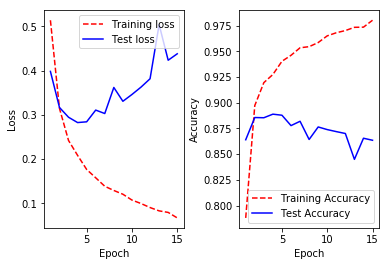

In [2]:
# Training Binary Classification using FeedForward Neural Network
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)

number_of_feature = 10000

(data_train, y_train), (data_test, y_test) = imdb.load_data(num_words=number_of_feature)

# convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_feature)
X_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
X_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

#Start NN
network = models.Sequential()

# Add Relu layer
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_feature, )))

# Add Relu layer
network.add(layers.Dense(units=16, activation='relu'))

# Add Relu layer
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile NN
network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

#Train NN
history = network.fit(X_train, y_train, epochs=15, verbose=0, batch_size=1000, 
                     validation_data=(X_test, y_test))

#training and test lost history
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# number of epochs
epoch_count = range(1, len(training_loss)+1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(1,2,1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
#plt.show()

#training and test accuracy history
training_acc = history.history["acc"]
test_acc = history.history["val_acc"]

plt.subplot(1,2,2)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [1]:
# Training multi-class Classification using FeedForwar NN
import numpy as np
from keras.datasets import reuters
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical

np.random.seed(0)

number_of_feature = 5000

(data_train, target_train), (data_test, target_test) = reuters.load_data(num_words=number_of_feature)

# convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_feature)
X_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
X_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# one-hot encode target vector
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)

#Start NN
network = models.Sequential()

# Add Relu layer
network.add(layers.Dense(units=100, activation='relu', input_shape=(number_of_feature, )))

# Add Relu layer
network.add(layers.Dense(units=100, activation='relu'))

# Add Relu layer
network.add(layers.Dense(units=46, activation='softmax'))

# Compile NN
network.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

#Train NN
history = network.fit(X_train, y_train, epochs=3, verbose=0, batch_size=100, 
                     validation_data=(X_test, y_test))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Neural Network also can be used for regression problems. We should remove the activation function in output layer to have continuous output.

In [3]:
# FeedForward NN for Regression
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import layers, models
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(0)

X, y = make_regression(n_samples=10000, n_features=3, n_informative=3, n_targets=1, noise=0.0, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

network = models.Sequential()
# Add Relu layer
network.add(layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1], )))
# Add Relu layer
network.add(layers.Dense(units=32, activation='relu'))

# Add Relu layer
network.add(layers.Dense(units=1)) # no activation function::: continuous output

# Compile NN
network.compile(loss='mse', optimizer='RMSprop', metrics=["mse"])

#Train NN
history = network.fit(X_train, y_train, epochs=10, verbose=0, batch_size=100, 
                     validation_data=(X_test, y_test))

Regularization is a strategy that can be used to overcome overfitting in NN. 

In [4]:
# Regularizing Weights for Overfitting
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

np.random.seed(0)

number_of_feature = 1000

(data_train, y_train), (data_test, y_test) = imdb.load_data(num_words=number_of_feature)

# convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_feature)
X_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
X_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

#Start NN
network = models.Sequential()

# Add Relu layer
network.add(layers.Dense(units=16, activation='relu',
                         kernel_regularizer=regularizers.l2(0.01), input_shape=(number_of_feature, )))

# Add Relu layer
network.add(layers.Dense(units=16, kernel_regularizer=regularizers.l2(0.01), activation='relu'))

# Add Relu layer
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile NN
network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

#Train NN
history = network.fit(X_train, y_train, epochs=3, verbose=0, batch_size=100, 
                     validation_data=(X_test, y_test))
# prediction
predicted_y = network.predict(X_test)
predicted_y[0]




array([0.31616694], dtype=float32)

Another strategy for reducing overfitting is called Early Stopping

range(1, 7)


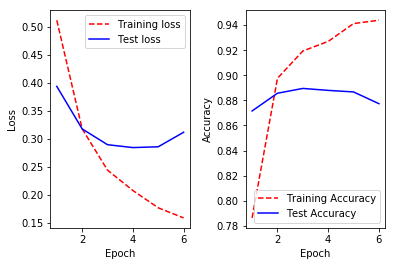

In [14]:
# Early stopping for Overfitting
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

np.random.seed(0)

number_of_feature = 10000

(data_train, y_train), (data_test, y_test) = imdb.load_data(num_words=number_of_feature)

# convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_feature)
X_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
X_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

#Start NN
network = models.Sequential()

# Add Relu layer
network.add(layers.Dense(units=16, activation='relu',
                         input_shape=(number_of_feature, )))

# Add Relu layer
network.add(layers.Dense(units=16, activation='relu'))

# Add Relu layer
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile NN
network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

# set callback function to early stop training and save the best model
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5", monitor="val_loss", save_best_only=True)]

#Train NN
history = network.fit(X_train, y_train, epochs=15, callbacks=callbacks, verbose=0, batch_size=1000, 
                     validation_data=(X_test, y_test))
# prediction
predicted_y = network.predict(X_test)
predicted_y[0]

#training and test lost history
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# number of epochs
epoch_count = range(1, len(training_loss)+1)
print(epoch_count)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(1,2,1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
#plt.show()

#training and test accuracy history
training_acc = history.history["acc"]
test_acc = history.history["val_acc"]

plt.subplot(1,2,2)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


Another strategy is Dropout

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


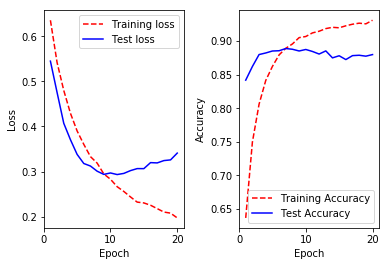

In [5]:
# Dropout for Overfitting
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)

number_of_feature = 10000

(data_train, y_train), (data_test, y_test) = imdb.load_data(num_words=number_of_feature)

# convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_feature)
X_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
X_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

#Start NN
network = models.Sequential()

# Add dropout for input layer
network.add(layers.Dropout(0.2, input_shape=(number_of_feature, )))

# Add Relu layer
network.add(layers.Dense(units=16, activation='relu'))

# Add dropout for input layer
network.add(layers.Dropout(0.5))

# Add Relu layer
network.add(layers.Dense(units=16, activation='relu'))

# Add dropout for input layer
network.add(layers.Dropout(0.5))

# Add Relu layer
network.add(layers.Dense(units=1, activation='sigmoid'))

# Compile NN
network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy"])


#Train NN
history = network.fit(X_train, y_train, epochs=20, verbose=0, batch_size=1000, 
                     validation_data=(X_test, y_test))
# prediction
predicted_y = network.predict(X_test)
predicted_y[0]

#training and test lost history
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# number of epochs
epoch_count = range(1, len(training_loss)+1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(1,2,1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

#training and test accuracy history
training_acc = history.history["acc"]
test_acc = history.history["val_acc"]

plt.subplot(1,2,2)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


Choosing the best hyperparameters is very important but difficult. It can be done using grid search.

In [19]:
# Tuning Hyperparameters in NN using GridSearchCV
import numpy as np
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

np.random.seed(0)
number_of_feature = 100

X, y = make_classification(n_samples=10000, n_features=number_of_feature, n_informative=3, 
                          n_redundant=0, n_classes=2, weights=[.5, .5], random_state=0 )

def create_network(optimizer = "rmsprop"):
    #Start NN
    network = models.Sequential()
    # Add Relu layer
    network.add(layers.Dense(units=16, activation='relu',
                         input_shape=(number_of_feature, )))
    # Add Relu layer
    network.add(layers.Dense(units=16, activation='relu'))
    # Add Relu layer
    network.add(layers.Dense(units=1, activation='sigmoid'))
    # Compile NN
    network.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return network
#wrap keras model to be used by sklearn
NN = KerasClassifier(build_fn=create_network, verbose=0)

# Hyperparameter range
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

hyperparameter = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

grid = GridSearchCV(estimator=NN, param_grid=hyperparameter)

grid_result = grid.fit(X, y)

grid_result.best_params_


{'batch_size': 5, 'epochs': 5, 'optimizer': 'adam'}

Convolutional Neural Network (CNN) is a type of NN that is used for image classification. There are different layers in CNN. 

1. Convolution Layer: It does the convolution operation.

2. Pooling Layer: Downsampling the feature

4. Fully connected layer: Classifies the image.


range(1, 16)


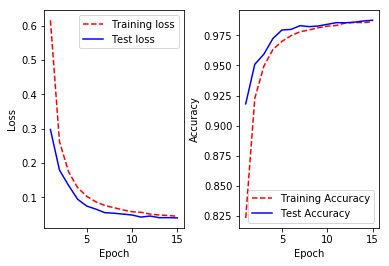

In [35]:
import numpy as np 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# Set the color channel value be first
K.set_image_data_format("channels_first")

np.random.seed(0)

# image info
channel = 1
height = 28
width = 28


(data_train, y_train), (data_test, y_test) = mnist.load_data()

data_train = data_train.reshape(data_train.shape[0], channel, height, width)
data_test = data_test.reshape(data_test.shape[0], channel, height, width)

X_train = data_train /255
X_test = data_test / 255

# One-hot encoded the target
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
number_of_class = y_test.shape[1]

network = Sequential()
network.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(channel, width, height),
                  activation='relu'))
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.5))
network.add(Flatten())

network.add(Dense(number_of_class, activation='softmax'))

network.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

#Train NN
history = network.fit(X_train, y_train, epochs=15, verbose=0, batch_size=1000, 
                     validation_data=(X_test, y_test))

# prediction
predicted_y = network.predict(X_test)
predicted_y[0]

#training and test lost history
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# number of epochs
epoch_count = range(1, len(training_loss)+1)
print(epoch_count)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(1,2,1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
#plt.show()

#training and test accuracy history
training_acc = history.history["acc"]
test_acc = history.history["val_acc"]

plt.subplot(1,2,2)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

## Long Short-Term Memory 

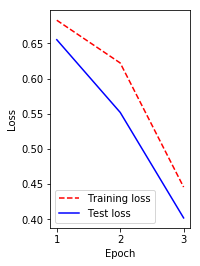

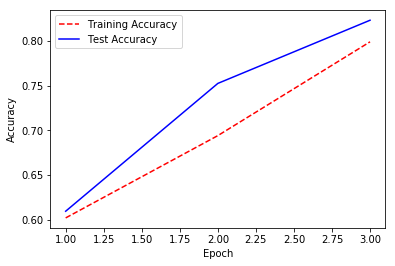

In [7]:
# LSTM RNN
import numpy as np 
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models, layers

np.random.seed(0)

number_of_features = 1000
(data_train, y_train), (data_test, y_test) = imdb.load_data(num_words=number_of_features)

# Use padding or truncation to make each observation have 400 features
X_train = sequence.pad_sequences(data_train, maxlen=400)
X_test = sequence.pad_sequences(data_test, maxlen=400)


network = models.Sequential()
network.add(layers.Embedding(input_dim=number_of_feature, output_dim=128))
network.add(layers.LSTM(units=128))
network.add(layers.Dense(units=1, activation='sigmoid'))

network.compile(loss='binary_crossentropy', optimizer='Adam', metrics=["accuracy"])

#Train RNN
history = network.fit(X_train, y_train, epochs=3, verbose=0, batch_size=1000, validation_data=(X_test, y_test))

#training and test lost history
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# number of epochs
epoch_count = range(1, len(training_loss)+1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(1,2,1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

#training and test accuracy history
training_acc = history.history["acc"]
test_acc = history.history["val_acc"]

#plt.subplot(1,2,2)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()
